In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/diabetes.csv')
# df=pd.read_csv('diabetes.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
df['Outcome']=df['Outcome'].map({1:'Y',0:'N'})

In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Y
1,1,85,66,29,0,26.6,0.351,31,N
2,8,183,64,0,0,23.3,0.672,32,Y
3,1,89,66,23,94,28.1,0.167,21,N
4,0,137,40,35,168,43.1,2.288,33,Y


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [87]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [88]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [89]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


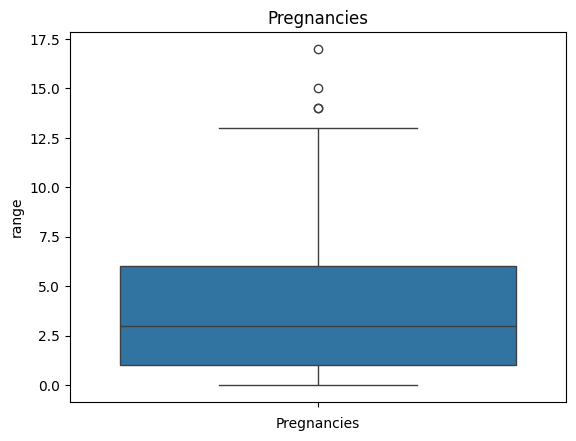

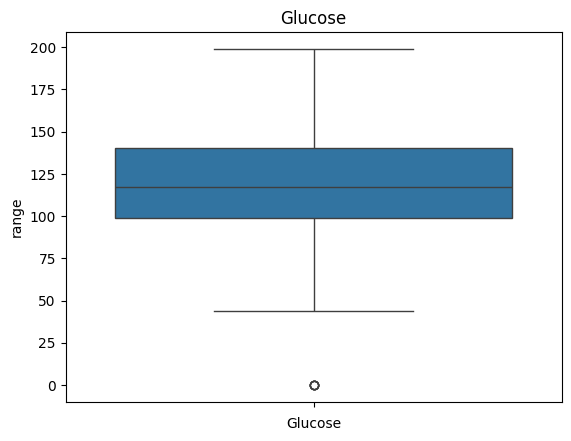

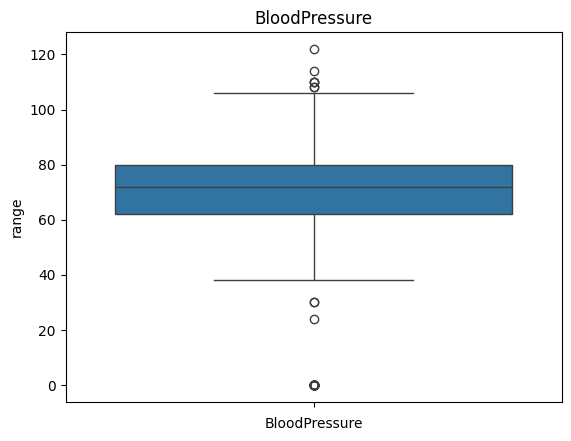

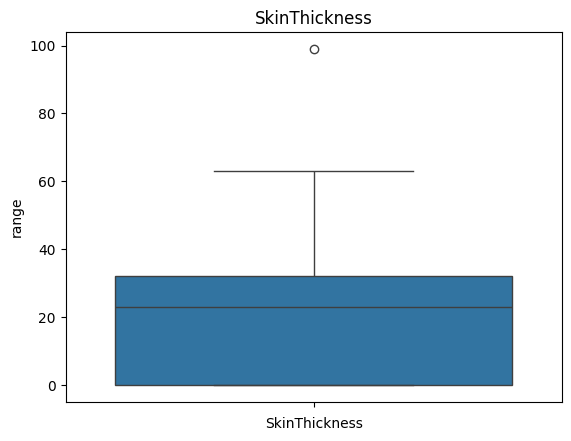

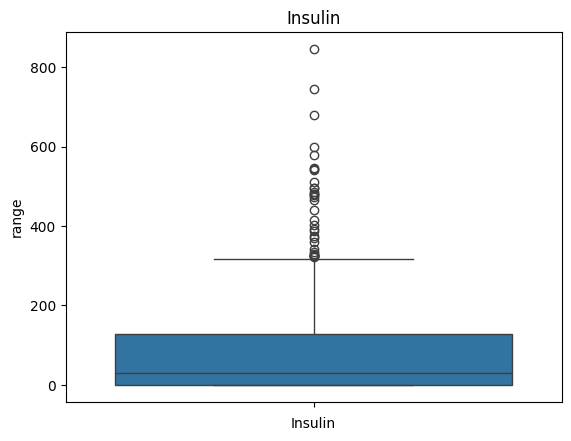

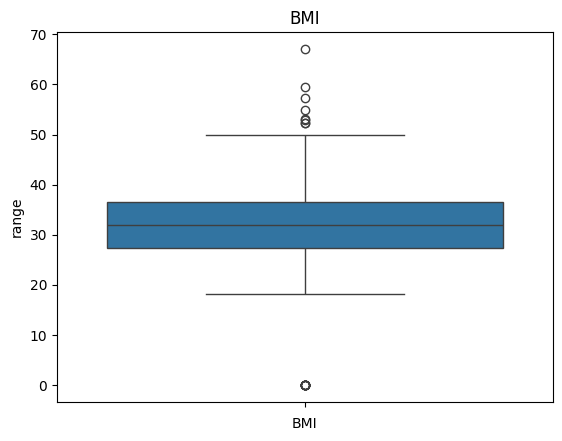

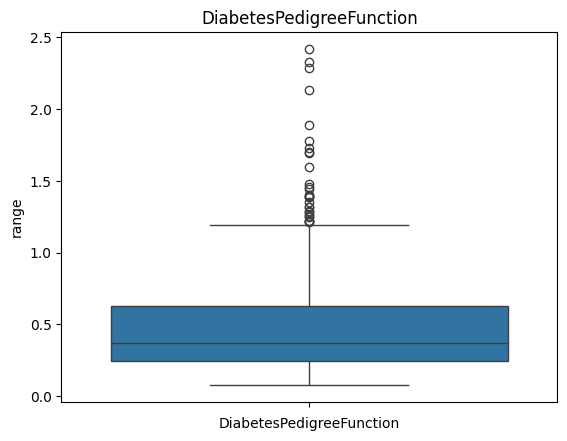

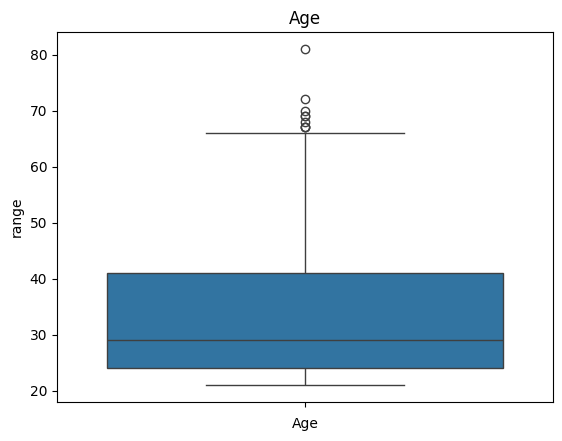

In [90]:
#Outlier detection using boxplots for  numeric data
df.columns
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('range')
        plt.title(i)
        plt.show()

In [91]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df=df[(df[i]>=lower_limit) & (df[i]<=upper_limit)]

In [92]:
y=df['Outcome']

In [93]:
X=df.drop(columns=['Outcome'])

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Without using cross validation from the start itself:-

In [95]:
K=[]
training=[]
test=[]
scores={}
for k in range(2,21):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    training_score=clf.score(X_train,y_train)
    test_score=clf.score(X_test,y_test)
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k]=[training_score,test_score]

In [96]:
for keys,values in scores.items():
    print(keys,":",values)


2 : [0.8543307086614174, 0.7421875]
3 : [0.8641732283464567, 0.71875]
4 : [0.8287401574803149, 0.7265625]
5 : [0.8228346456692913, 0.7421875]
6 : [0.8070866141732284, 0.7578125]
7 : [0.812992125984252, 0.75]
8 : [0.8188976377952756, 0.7421875]
9 : [0.8051181102362205, 0.7421875]
10 : [0.8070866141732284, 0.734375]
11 : [0.8011811023622047, 0.7421875]
12 : [0.7933070866141733, 0.7265625]
13 : [0.7952755905511811, 0.7265625]
14 : [0.8051181102362205, 0.71875]
15 : [0.812992125984252, 0.734375]
16 : [0.8110236220472441, 0.7265625]
17 : [0.8110236220472441, 0.7421875]
18 : [0.7933070866141733, 0.734375]
19 : [0.7933070866141733, 0.7421875]
20 : [0.7933070866141733, 0.75]


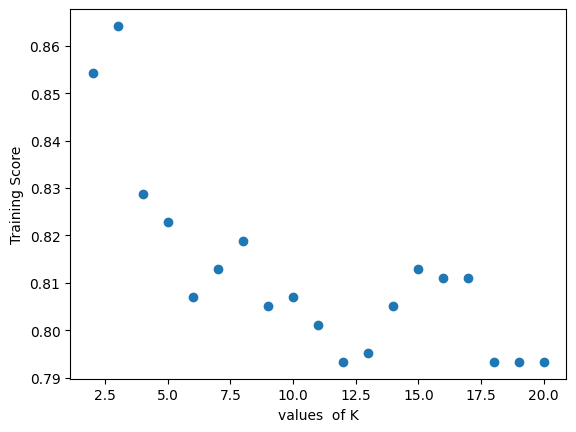

In [97]:
plt.scatter(K,training)
plt.xlabel('values  of K')
plt.ylabel('Training Score')
plt.show()

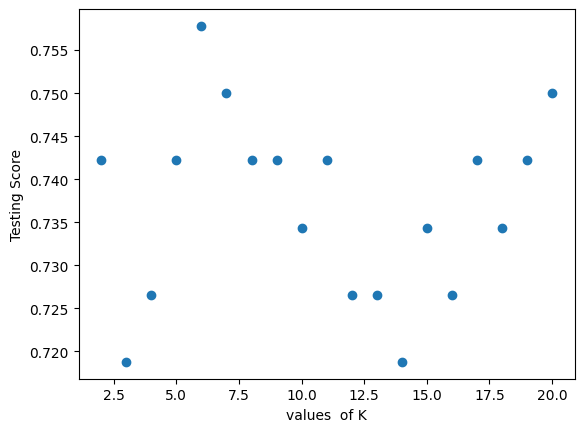

In [98]:
plt.scatter(K,test)
plt.xlabel('values  of K')
plt.ylabel('Testing Score')
plt.show()

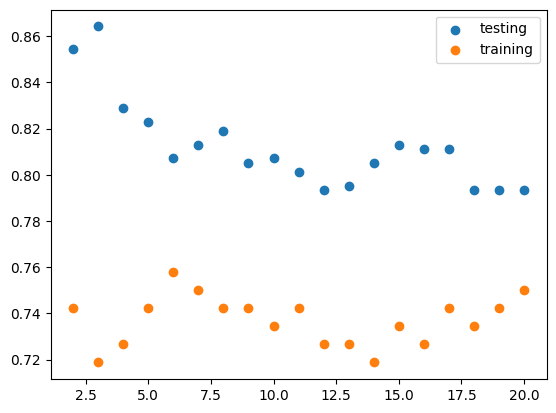

In [99]:
plt.scatter(K,training)

plt.scatter(K,test)
plt.legend(['testing','training'])
plt.savefig('a2.png')
plt.show()

In [100]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
training_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)

In [101]:
print(training_score,test_score)

0.8228346456692913 0.7421875


In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [103]:
print(accuracy_score(y_test,y_pred))

0.7421875


In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.79      0.88      0.83        92
           Y       0.56      0.39      0.46        36

    accuracy                           0.74       128
   macro avg       0.67      0.63      0.64       128
weighted avg       0.72      0.74      0.73       128



In [105]:
print(confusion_matrix(y_test,y_pred))

[[81 11]
 [22 14]]


In [106]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 14
True Negatives (TN): 81
False Positives (FP): 11
False Negatives (FN): 22


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

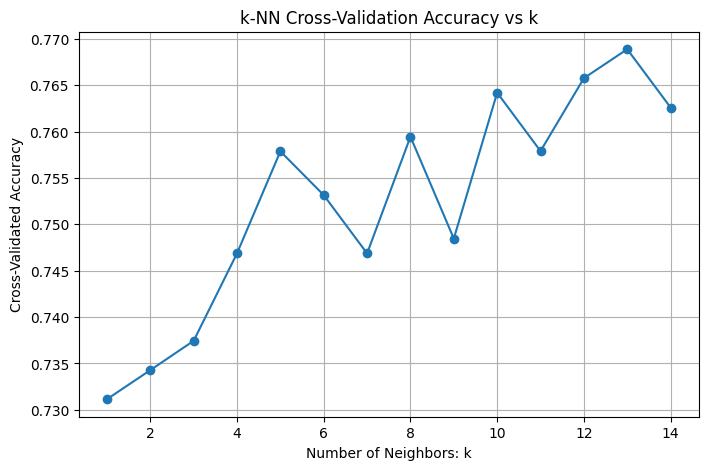

Best k from cross-validation: 13


In [108]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 15)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

In [109]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=13): {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=13): 0.73


# Using cross validation from the start only:-

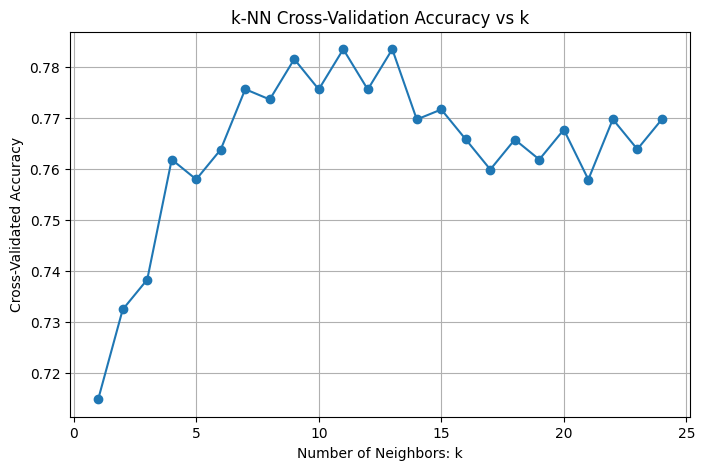

Best k from cross-validation: 11


In [110]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 25)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

In [111]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=11): {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=11): 0.74


# KD TREE

In [112]:
import pandas as pd
df1 = pd.DataFrame([
    ['Michael Jordan', 'Basketball', 82, 30.1, 6.2, 5.3, 2.5],
    ['LeBron James', 'Basketball', 78, 27.5, 7.8, 7.0, 1.8],
    ['Serena Williams', 'Tennis', 60, 80, 15, 5, 0],
    ['Usain Bolt', 'Athletics', 15, 9.58, 0, 0, 0],
    ['Lionel Messi', 'Soccer', 38, 25, 18, 5, 0],
    ['Cristiano Ronaldo', 'Soccer', 36, 28, 12, 3, 0]
], columns=['Athlete', 'Sport', 'Games Played', 'Points', 'Assists', 'Rebounds', 'Turnovers'])

cn= pd.DataFrame([['Stephen Curry', 'Basketball', 75, 29.3, 6.5, 4.2, 3.1],
    ['Novak Djokovic', 'Tennis', 62, 75, 10, 6, 1],
    ['Mo Farah', 'Athletics', 20, 13.1, 0, 0, 0]
], columns=['Athlete', 'Sport', 'Games Played', 'Points', 'Assists', 'Rebounds', 'Turnovers'])

features=['Games Played','Points','Assists','Rebounds','Turnovers']

from sklearn.neighbors import KDTree
tree = KDTree(df1[features])
closest = []

for idx, row in cn.iterrows():

    X = row[features].values.reshape(1, -1)
    distances, ndx = tree.query(X, k=2, return_distance=True)
    print(distances, ndx)
    closest.append(ndx)

    FamousAthlete = cn.loc[idx,'Athlete']
    closestAthletes = [ df1.loc[x,'Athlete'] for x in ndx[0] ]

    print ('%s closest to: %s' %(FamousAthlete, closestAthletes))


[[4.84355242 7.16240183]] [[1 0]]
Stephen Curry closest to: ['LeBron James', 'Michael Jordan']
[[ 7.48331477 49.32737577]] [[2 0]]
Novak Djokovic closest to: ['Serena Williams', 'Michael Jordan']
[[ 6.11476901 25.11991242]] [[3 5]]
Mo Farah closest to: ['Usain Bolt', 'Cristiano Ronaldo']


In [113]:
df1[features].shape

(6, 5)

In [114]:
df1[features]

,Games Played,Points,Assists,Rebounds,Turnovers
0,82,30.10,6.2,5.3,2.5
1,78,27.50,7.8,7.0,1.8
2,60,80.00,15.0,5.0,0.0
3,15,9.58,0.0,0.0,0.0
4,38,25.00,18.0,5.0,0.0
5,36,28.00,12.0,3.0,0.0


# KD Tree for our original dataset - Diabetes.csv

In [115]:
X=df.drop(columns=['Outcome'])

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [117]:
from sklearn.neighbors import KDTree
tree = KDTree(X_train, leaf_size=10)
closest = []

for idx, row in X_test.iterrows():


    distances, ndx = tree.query(X_test, k=2, return_distance=True)
    closest.append(ndx)

    X_test_n = X_test.loc[idx,'Age']
    closestNeigh = [ X_train.loc[x,'Age'] for x in ndx[0] ]

    print ('%s closest to: %s' %(X_test_n, closestNeigh))

print(closest)

Streaming output truncated to the last 5000 lines.
       [228,  29],
       [180, 268],
       [264,  60],
       [196, 113],
       [179, 303],
       [418, 289],
       [316,  36],
       [323, 283],
       [148,  74],
       [369,  26],
       [292, 432],
       [ 51, 199],
       [405, 323],
       [376, 212],
       [133, 330],
       [300,   3],
       [376,  22],
       [165, 257],
       [230,  66],
       [171, 288],
       [ 84, 148],
       [168, 264],
       [133, 330],
       [143, 200],
       [370, 346],
       [344,  11],
       [393, 390],
       [227, 345],
       [171, 430],
       [ 24,  76],
       [271,  22],
       [ 56, 321],
       [ 72, 213],
       [ 50,  76],
       [ 34, 232],
       [417, 329],
       [ 51, 306],
       [ 41, 379],
       [161, 212],
       [408, 338],
       [302, 434],
       [215, 293],
       [232, 443],
       [285,   4],
       [276, 291],
       [ 27, 122],
       [210,  35],
       [420, 391],
       [104, 312],
       [206, 227],

In [118]:
print(ndx)

[[170  28]
 [177 129]
 [282  61]
 [312 376]
 [287  49]
 [ 62 258]
 [111 108]
 [  7 304]
 [  3 339]
 [ 87 387]
 [ 81  67]
 [207 380]
 [ 16  29]
 [158  36]
 [292 101]
 [ 92 171]
 [ 74 132]
 [291 227]
 [143 200]
 [ 72 213]
 [376  28]
 [ 19 153]
 [397 264]
 [143 438]
 [418 289]
 [191 209]
 [117 312]
 [ 12  69]
 [ 84 294]
 [ 87 387]
 [196 323]
 [ 33 131]
 [296 188]
 [ 22 425]
 [295 154]
 [ 64  57]
 [171 288]
 [265  93]
 [144  45]
 [107  15]
 [230 145]
 [195 232]
 [ 85 388]
 [139 345]
 [161 279]
 [439 355]
 [226 130]
 [263 187]
 [104 312]
 [417 327]
 [359 286]
 [376 312]
 [  6 136]
 [345 222]
 [ 20 148]
 [398 155]
 [380   2]
 [125 157]
 [346 383]
 [296 188]
 [358 343]
 [ 37 184]
 [192  16]
 [ 63  18]
 [ 54 286]
 [ 17 274]
 [245 305]
 [ 11   6]
 [ 71 130]
 [271 377]
 [330 157]
 [205 208]
 [ 94 320]
 [335  61]
 [158 308]
 [372 185]
 [300 122]
 [ 20 347]
 [270  43]
 [415 344]
 [388 326]
 [410 286]
 [397 421]
 [226  60]
 [241  10]
 [171 152]
 [161 130]
 [190 236]
 [215 299]
 [148 395]
 [301 123]

In [119]:
X_test.loc[idx]

,733
Pregnancies,2.000
Glucose,106.000
BloodPressure,56.000
SkinThickness,27.000
Insulin,165.000
BMI,29.000
DiabetesPedigreeFunction,0.426
Age,22.000


In [120]:
print(X_test.loc[idx,'Age'])

22
